In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install imbalanced-learn

In [4]:
df = pd.read_csv("fraudTrain.csv")

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
# Filter the row where 'Unnamed: 0' equals 890208
specific_row = df[df['Unnamed: 0'] == 890208]

# Display the row
print(specific_row)

        Unnamed: 0 trans_date_trans_time            cc_num  \
890208      890208   2019-12-23 22:55:12  6011581063717667   

                    merchant     category     amt  first     last gender  \
890208  fraud_Murray-Smitham  grocery_pos  345.48  Jerry  Perkins      M   

                             street  ...      lat     long  city_pop  \
890208  3867 Susan Corners Apt. 883  ...  40.1959 -92.4333       805   

                          job         dob                         trans_num  \
890208  Private music teacher  1970-06-27  88caed59fb2791e69df3f3a4e909e257   

         unix_time  merch_lat merch_long  is_fraud  
890208  1356303312  39.445176  -91.75659         1  

[1 rows x 23 columns]


In [10]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [12]:
# Remove 'fraud_' prefix from the merchant column
df['merchant'] = df['merchant'].str.replace('fraud_', '', regex=False)

# Check the updated column
print(df['merchant'].head())

0            Rippin, Kub and Mann
1       Heller, Gutmann and Zieme
2                  Lind-Buckridge
3    Kutch, Hermiston and Farrell
4                   Keeling-Crist
Name: merchant, dtype: object


In [14]:
fraud_data = df[df['is_fraud'] == 1]
nonfraud_data = df[df['is_fraud'] == 0]

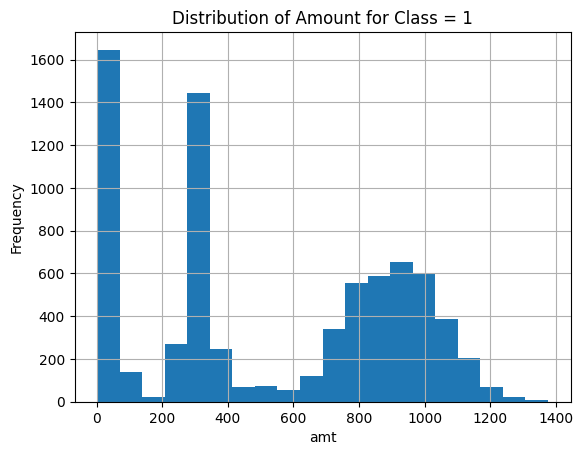

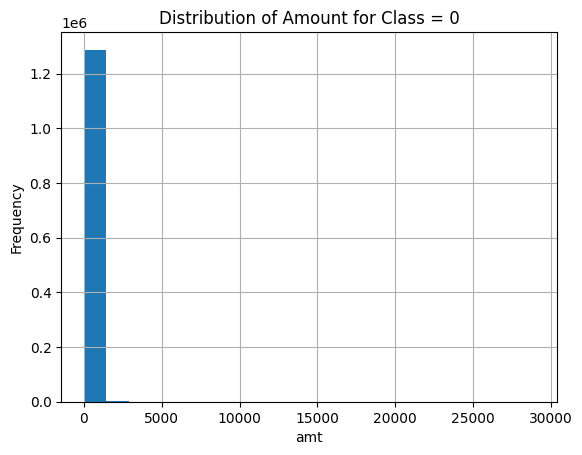

In [ ]:
import matplotlib.pyplot as plt
fraud_data['amt'].hist(bins=20)
plt.title('Distribution of Amount for Class = 1')
plt.xlabel('amt')
plt.ylabel('Frequency')
plt.show()

nonfraud_data['amt'].hist(bins=20)
plt.title('Distribution of Amount for Class = 0')
plt.xlabel('amt')
plt.ylabel('Frequency')
plt.show()

In [16]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [20]:
total_class_distribution = df['is_fraud'].value_counts()
print("Class distribution in the entire dataset:")
print(total_class_distribution)

Class distribution in the entire dataset:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64


In [22]:
class_column = 'is_fraud'  # Replace with your actual class column name

# Separate majority and minority classes
class_0 = df[df[class_column] == 0]
class_1 = df[df[class_column] == 1]

# Downsample class 0 using stratified sampling
# Adjust the size as needed, e.g., reduce class 0 to 20% of its original size
class_0_sampled = class_0.sample(frac=0.02, random_state=42)

# Combine the reduced class 0 with class 1
balanced_df = pd.concat([class_0_sampled, class_1])

# Shuffle the combined dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [24]:
total_class_distribution = balanced_df['is_fraud'].value_counts()
print("Class distribution in the entire dataset:")
print(total_class_distribution)

Class distribution in the entire dataset:
is_fraud
0    25783
1     7506
Name: count, dtype: int64


In [26]:
from sklearn.utils import resample

# Split the data by class
class_0 = df[df['is_fraud'] == 0]
class_1 = df[df['is_fraud'] == 1]

# Undersample class 0
class_0_undersampled = resample(class_0,
                                replace=False,    # Don't replace, just remove some samples
                                n_samples=len(class_1),  # Make the size of class 0 equal to class 1
                                random_state=42)  # For reproducibility

# Combine the undersampled class 0 with class 1
balanced_data = pd.concat([class_0_undersampled, class_1])

In [28]:
balanced_data.shape[0]

15012

In [30]:
total_class_distribution = balanced_data['is_fraud'].value_counts()
print("Class distribution in the entire dataset:")
print(total_class_distribution)

Class distribution in the entire dataset:
is_fraud
0    7506
1    7506
Name: count, dtype: int64


In [32]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = balanced_df.drop(columns=['is_fraud'])  # Features
y = balanced_df['is_fraud']  # Target

# Train-test split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (23302, 22)
Testing set size: (9987, 22)


In [ ]:
X_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
9902,687728,2019-10-20 14:41:47,3590736522064285,"Reichert, Rowe and Mraz",shopping_net,213.34,Kimberly,Gonzalez,F,72966 Shannon Pass Apt. 391,...,72011,34.5091,-92.4828,4074,"Scientist, audiological",1975-12-20,f9ae9fecd1d34a688940a198eba3c94d,1350744107,34.122980,-92.069393
3828,399382,2019-06-30 20:40:01,4378993458389626,"Dare, Fritsch and Zboncak",health_fitness,19.28,Travis,Hayes,M,1561 Chase Grove,...,3818,43.9742,-71.1503,3807,Surgeon,1999-10-25,813fe5007c3fcda8beeff248fc33934b,1341088801,43.500503,-71.711188
32649,135829,2019-03-15 23:31:10,4659625317833446364,Gerlach Inc,shopping_net,1094.12,Richard,Moore,M,56261 Keith Plaza,...,47842,39.6591,-87.4208,10085,Hospital doctor,1964-11-18,896b9f6baea6ebb23fb2c32f04e512d0,1331854270,40.419938,-87.884809
7587,51834,2019-01-31 12:55:44,2383461948823908,Schoen Ltd,kids_pets,42.76,Patrick,Vaughan,M,651 Miller Common,...,4047,43.7450,-70.9092,1892,Audiological scientist,1956-03-02,29618f988b5399c823e79fd14059a0f4,1328014544,43.545333,-71.283994
25466,349639,2019-06-13 12:08:46,3531129874770000,Schiller Ltd,personal_care,8.58,Shelby,Mitchell,F,974 Cindy Stream,...,5733,43.8065,-73.0882,5895,"Scientist, marine",1975-07-13,ca13f52b435a5e0acca6d7ae062e0cd8,1339589326,42.940987,-73.498177


In [ ]:
X_train.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders for each categorical column
categorical_columns = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']  # Replace with your actual categorical columns
encoders = {}

# Encode training data
for col in categorical_columns:
    encoders[col] = LabelEncoder()
    X_train[col] = encoders[col].fit_transform(X_train[col])

print(X_train.head())

       Unnamed: 0  trans_date_trans_time               cc_num  merchant  \
9902       687728                  12504     3590736522064285       503   
3828       399382                   7338     4378993458389626       123   
32649      135829                   2671  4659625317833446364       189   
7587        51834                    985     2383461948823908       562   
25466      349639                   6447     3531129874770000       551   

       category      amt  first  last  gender  street  ...    zip      lat  \
9902         11   213.34    203   161       0     727  ...  72011  34.5091   
3828          5    19.28    335   183       1     152  ...   3818  43.9742   
32649        11  1094.12    277   294       1     571  ...  47842  39.6591   
7587          7    42.76    262   434       1     653  ...   4047  43.7450   
25466        10     8.58    301   290       0     963  ...   5733  43.8065   

          long  city_pop  job  dob  trans_num   unix_time  merch_lat  \
9902  -9

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution after SMOTE:
is_fraud
0    18048
1    18048
Name: count, dtype: int64


In [ ]:
print(X_train_resampled.dtypes)

Unnamed: 0                 int64
trans_date_trans_time      int64
cc_num                     int64
merchant                   int64
category                   int64
amt                      float64
first                      int64
last                       int64
gender                     int64
street                     int64
city                       int64
state                      int64
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                        int64
dob                        int64
trans_num                  int64
unix_time                  int64
merch_lat                float64
merch_long               float64
dtype: object


In [ ]:
# X_train_resampled['TransactionDate'] = encoders['TransactionDate'].inverse_transform(X_train_resampled['TransactionDate'])
# X_train_resampled['TransactionType'] = encoders['TransactionType'].inverse_transform(X_train_resampled['TransactionType'])
# X_train_resampled['Location'] = encoders['Location'].inverse_transform(X_train_resampled['Location'])

for col in categorical_columns:
    X_train_resampled[col] = encoders[col].inverse_transform(X_train_resampled[col])
X_train_resampled.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,687728,2019-10-20 14:41:47,3590736522064285,"Reichert, Rowe and Mraz",shopping_net,213.34,Kimberly,Gonzalez,F,72966 Shannon Pass Apt. 391,...,72011,34.5091,-92.4828,4074,"Scientist, audiological",1975-12-20,f9ae9fecd1d34a688940a198eba3c94d,1350744107,34.122980,-92.069393
1,399382,2019-06-30 20:40:01,4378993458389626,"Dare, Fritsch and Zboncak",health_fitness,19.28,Travis,Hayes,M,1561 Chase Grove,...,3818,43.9742,-71.1503,3807,Surgeon,1999-10-25,813fe5007c3fcda8beeff248fc33934b,1341088801,43.500503,-71.711188
2,135829,2019-03-15 23:31:10,4659625317833446400,Gerlach Inc,shopping_net,1094.12,Richard,Moore,M,56261 Keith Plaza,...,47842,39.6591,-87.4208,10085,Hospital doctor,1964-11-18,896b9f6baea6ebb23fb2c32f04e512d0,1331854270,40.419938,-87.884809
3,51834,2019-01-31 12:55:44,2383461948823908,Schoen Ltd,kids_pets,42.76,Patrick,Vaughan,M,651 Miller Common,...,4047,43.7450,-70.9092,1892,Audiological scientist,1956-03-02,29618f988b5399c823e79fd14059a0f4,1328014544,43.545333,-71.283994
4,349639,2019-06-13 12:08:46,3531129874770000,Schiller Ltd,personal_care,8.58,Shelby,Mitchell,F,974 Cindy Stream,...,5733,43.8065,-73.0882,5895,"Scientist, marine",1975-07-13,ca13f52b435a5e0acca6d7ae062e0cd8,1339589326,42.940987,-73.498177


In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "Your API KEY"

In [ ]:
system_prompt_with_labeled_data = """ You are an assistant trained to generate transaction descriptions based on financial fraud data.

Rules:
1. For transactions flagged as fraudulent (IsFraud = 1):
   - Provide a description that highlights suspicious behavior.
   - Include the features that would have affected the suspicious behavior and a plausible reason for suspicion.

2. For transactions flagged as non-fraudulent (IsFraud = 0):
   - Provide a description and a reason that reflects legitimate behavior.
   - Include the reasons and features that affirmed it to be not suspicious.

Use these guidelines to analyze the provided transaction data and generate appropriate descriptions but do not stick to the above said sentences, get creative and new with your descriptions.
"""

In [ ]:
system_prompt_without_labeled_data = """
You are an assistant trained to analyze transaction data and generate contextual descriptions of transactions. Based on the transaction details, determine whether the transaction appears fraudulent or legitimate and explain your reasoning.

Rules:
1. Use the provided transaction details (trans_date_trans_time, merchant, category, amount, job, lat, long, city pop and location etc) to infer whether the transaction is suspicious or legitimate.
2. Highlight specific patterns or anomalies (e.g., unusually high transaction value, foreign location, unusual merchant activity) that might indicate fraud.
3. For transactions that seem legitimate, provide a neutral description.

Examples:
1. If a transaction has a high amount compared to typical transactions, mention that as a potential fraud indicator.
2. If the transaction occurs at a foreign location or at an unusual time, highlight that as suspicious.
3. If the transaction seems routine (e.g., a low amount at a local merchant), classify it as legitimate.

Examples:
- Transaction details: Date: 2024-01-08, Amount: $4500.00, Merchant ID: 123, Location: New York.
  Description: 'On 2024-01-08, a transaction of $4500.00 was made at Merchant 123 in New York. The transaction appears suspicious because the amount is unusually high for standard transactions.'

- Transaction details: Date: 2024-01-05, Amount: $50.00, Merchant ID: 789, Location: Boston.
  Description: 'On 2024-01-05, a transaction of $50.00 was made at Merchant 789 in Boston. The transaction appears routine and legitimate.'

Use these guidelines to analyze the provided transaction data and generate appropriate descriptions but do not stick to the above said sentences, get creative and new with your descriptions. Limit your description to 100 words.

"""

In [ ]:
from openai import OpenAI
client = OpenAI()

In [ ]:
prompt = ""
def generate_transaction_description(row):
    # Prepare the dynamic prompt based on IsFraud value
    if row['IsFraud'] == 1:
        prompt = f"""
        Generate a fraudulent transaction description based on the following details:
        Data: f{row}
        Provide a reason for suspicion.
        """
    else:
        prompt = f"""
        Generate a legitimate transaction description based on the following details:
        Data: f{row}
        Confirm that the transaction is legitimate.
        """
    # Call the LLM API
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": f"{system_prompt_with_labeled_data}"},
            {
                "role": "user",
                "content": f"{row}"
            }
        ]
    )

    # Extract and return the generated text
    return completion.choices[0].message.content

In [ ]:
if not isinstance(y_train_resampled, pd.Series):
    y_train_resampled = pd.Series(y_train_resampled, name="IsFraud")

# Add IsFraud column to X_train_resampled
X_train_resampled['IsFraud'] = y_train_resampled.reset_index(drop=True)

# Verify the merged dataset
X_train_resampled.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,IsFraud
0,687728,2019-10-20 14:41:47,3590736522064285,"Reichert, Rowe and Mraz",shopping_net,213.34,Kimberly,Gonzalez,F,72966 Shannon Pass Apt. 391,...,34.5091,-92.4828,4074,"Scientist, audiological",1975-12-20,f9ae9fecd1d34a688940a198eba3c94d,1350744107,34.122980,-92.069393,0
1,399382,2019-06-30 20:40:01,4378993458389626,"Dare, Fritsch and Zboncak",health_fitness,19.28,Travis,Hayes,M,1561 Chase Grove,...,43.9742,-71.1503,3807,Surgeon,1999-10-25,813fe5007c3fcda8beeff248fc33934b,1341088801,43.500503,-71.711188,0
2,135829,2019-03-15 23:31:10,4659625317833446400,Gerlach Inc,shopping_net,1094.12,Richard,Moore,M,56261 Keith Plaza,...,39.6591,-87.4208,10085,Hospital doctor,1964-11-18,896b9f6baea6ebb23fb2c32f04e512d0,1331854270,40.419938,-87.884809,1
3,51834,2019-01-31 12:55:44,2383461948823908,Schoen Ltd,kids_pets,42.76,Patrick,Vaughan,M,651 Miller Common,...,43.7450,-70.9092,1892,Audiological scientist,1956-03-02,29618f988b5399c823e79fd14059a0f4,1328014544,43.545333,-71.283994,0
4,349639,2019-06-13 12:08:46,3531129874770000,Schiller Ltd,personal_care,8.58,Shelby,Mitchell,F,974 Cindy Stream,...,43.8065,-73.0882,5895,"Scientist, marine",1975-07-13,ca13f52b435a5e0acca6d7ae062e0cd8,1339589326,42.940987,-73.498177,0


In [ ]:
# chunk_size = 1  # Size of the chunk to process
# first_chunk = X_train_resampled.iloc[:chunk_size]  # Take the first `chunk_size` rows
# first_chunk.head()

# # Apply the function to the first chunk
# first_chunk['GeneratedDescription'] = first_chunk.apply(generate_transaction_description, axis=1)

In [ ]:
len(X_train_resampled)

36096

In [ ]:
# def process_and_add_column(data, chunk_size=100):
#     for i in range(0, len(data), chunk_size):
#         chunk = data.iloc[i:i + chunk_size]
#         for index, row in chunk.iterrows():
#             # Generate the description for each row
#             description = generate_transaction_description(row)

#             # Add the description to the new column immediately
#             data.at[index, 'GeneratedDescription'] = description
#     return data

def process_and_add_column(data, chunk_size=100):
    for i in range(3000, len(data), chunk_size):
        # Extract the current chunk
        chunk = data.iloc[i:i + chunk_size]

        for index, row in chunk.iterrows():
            # Generate the description for each row
            description = generate_transaction_description(row)

            # Add the description to the new column immediately
            data.at[index, 'GeneratedDescription'] = description

        # Save progress after processing the chunk
        print(f"Saving progress after processing rows {i} to {i + chunk_size}...")
        data.to_csv('intermediate_results.csv', index=False)

    return data


In [ ]:
chunk_size = 100  # Adjust based on your needs
# X_train_resampled['GeneratedDescription'] = None  # Initialize the column
X_train_resampled = process_and_add_column(X_train_resampled, chunk_size)

Saving progress after processing rows 3000 to 3100...
Saving progress after processing rows 3100 to 3200...
Saving progress after processing rows 3200 to 3300...
Saving progress after processing rows 3300 to 3400...
Saving progress after processing rows 3400 to 3500...
Saving progress after processing rows 3500 to 3600...
Saving progress after processing rows 3600 to 3700...
Saving progress after processing rows 3700 to 3800...
Saving progress after processing rows 3800 to 3900...
Saving progress after processing rows 3900 to 4000...
Saving progress after processing rows 4000 to 4100...
Saving progress after processing rows 4100 to 4200...
Saving progress after processing rows 4200 to 4300...
Saving progress after processing rows 4300 to 4400...
Saving progress after processing rows 4400 to 4500...
Saving progress after processing rows 4500 to 4600...
Saving progress after processing rows 4600 to 4700...
Saving progress after processing rows 4700 to 4800...
Saving progress after proces

In [ ]:
def process_in_chunks(data, chunk_size=100):
    descriptions = []
    for i in range(0, len(data), chunk_size):
        chunk = data.iloc[i:i+chunk_size]
        chunk['GeneratedDescription'] = chunk.apply(generate_transaction_description, axis=1)
        descriptions.extend(chunk['GeneratedDescription'].tolist())
    return descriptions

# Process dataset in chunks
chunk_size = 100  # Adjust based on your needs
X_train_resampled['GeneratedDescription'] = process_in_chunks(X_train_resampled, chunk_size)

In [ ]:
X_train_resampled.head()

In [ ]:
X_train_resampled.to_csv('data.csv', index=False)

In [ ]:
first_chunk.head()

In [ ]:
print(first_chunk['GeneratedDescription'].iloc[0])

In [ ]:
first_chunk = y_train_resampled.iloc[:1]
first_chunk.head()